In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# create an Observables object to store information for derivatives
obs = Observables(parameters= ['omega_b', 'omega_cdm', 'h', 'n_s', 'A_s', 'tau_reio'],
                  fiducial=[2.25905508e-02,   1.10739843e-01,   0.7,
         9.64799673e-01,   2.16042894e-09,   8.57045188e-02],
                  left=[2.15905508e-02,   1.00739843e-01,   0.7 - 0.02,
         9.54799673e-01,   2.06042894e-09,   8.47045188e-02],
                  right=[2.35905508e-02,   1.20739843e-01,   0.7 + 0.02,
         9.74799673e-01,   2.26042894e-09,   8.67045188e-02])

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'no'}
# classy_template.update(fishchips.util.PRECISE_CLASS_DICT)

# generate the fiducial cosmology
obs.compute_cosmo(key='CLASS_fiducial', classy_dict=classy_template)

# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_CLASS_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_CLASS_right', classy_dict=classy_right)
    

In [ ]:
s4 = fishchips.experiments.get_S4()

In [36]:
[exp.get_fisher(obs, lensed_Cl=True) for exp in s4]

[array([[ 2.69115876e+07, -3.85011037e+05,  8.77926554e+05,
          3.40520381e+05, -2.19810816e+14,  9.73414670e+05],
        [-3.85011037e+05,  1.40657798e+04, -7.82212083e+03,
         -5.82085553e+03,  2.67695869e+12, -1.19876969e+04],
        [ 8.77926554e+05, -7.82212083e+03,  3.12863325e+04,
          1.07733038e+04, -7.50282013e+12,  3.31433104e+04],
        [ 3.40520381e+05, -5.82085553e+03,  1.07733038e+04,
          1.65946212e+04, -7.05534151e+12,  3.13518228e+04],
        [-2.19810816e+14,  2.67695869e+12, -7.50282013e+12,
         -7.05534151e+12,  3.36128211e+21, -1.49090660e+13],
        [ 9.73414670e+05, -1.19876969e+04,  3.31433104e+04,
          3.13518228e+04, -1.49090660e+13,  6.61377753e+04]]),
 array([[ 4.18656047e+09, -7.34223652e+08, -1.13414697e+08,
          9.63932197e+07,  3.13123679e+16, -1.32703247e+08],
        [-7.34223652e+08,  3.18607897e+08,  6.86333602e+07,
         -1.64273560e+07, -7.62844804e+15,  3.14036497e+07],
        [-1.13414697e+08,  6.8

In [32]:
fisher = np.sum( [exp.get_fisher(obs, lensed_Cl=False) for exp in s4], axis=0 )
fisher

array([[ 7.68833756e+09, -1.74254960e+09, -3.32850477e+08,
         1.35034320e+08,  3.89950690e+16, -1.75637116e+08],
       [-1.74254960e+09,  8.44693869e+08,  1.35870849e+08,
        -2.83369915e+07, -1.06368218e+16,  4.79024611e+07],
       [-3.32850477e+08,  1.35870849e+08,  9.94562103e+07,
        -8.52573344e+05, -8.92586840e+14,  4.01913032e+06],
       [ 1.35034320e+08, -2.83369915e+07, -8.52573344e+05,
         5.16934192e+06,  1.83243747e+15, -8.25500753e+06],
       [ 3.89950690e+16, -1.06368218e+16, -8.92586840e+14,
         1.83243747e+15,  7.87673076e+23, -3.54695814e+15],
       [-1.75637116e+08,  4.79024611e+07,  4.01913032e+06,
        -8.25500753e+06, -3.54695814e+15,  1.59826544e+07]])

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{n\\_s}$', '$\\mathrm{A\\_s}$', '$\\mathrm{tau\\_reio}$']


0.009814863092931057

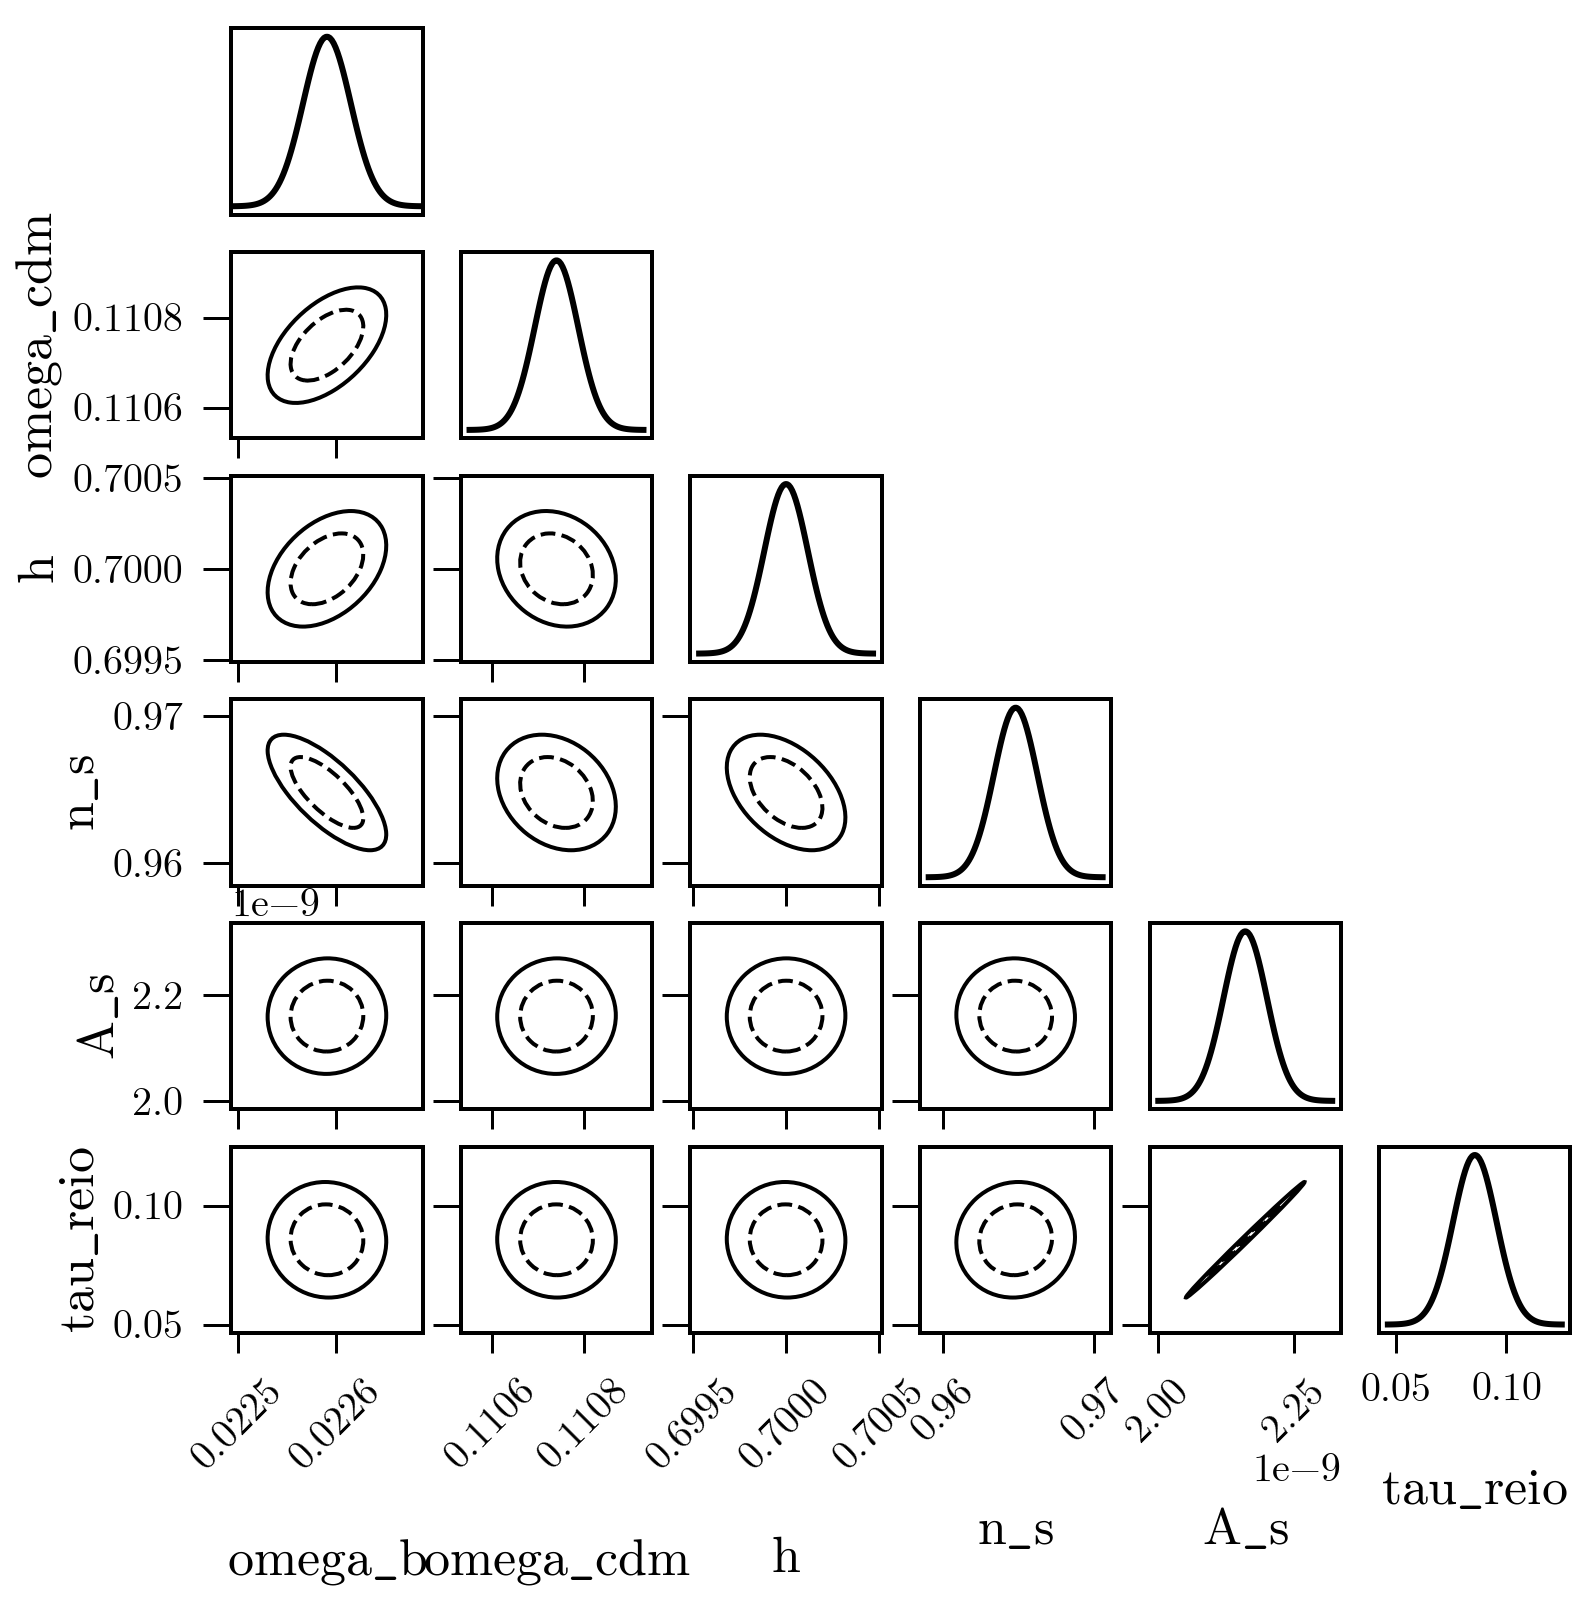

In [33]:
cov = np.linalg.inv(fisher)
fig, ax = fishchips.util.plot_triangle(obs, cov);

np.sqrt( cov[-1,-1] )

In [35]:
np.sqrt(cov[-1,-1])

0.009814863092931057